In [1]:
import pandas as pd
from pybaseball import batting_stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Initialize an empty DataFrame
all_years_data = pd.DataFrame()

# Loop through the years of interest
for year in range(2015, 2023):  # 2023 is the stop argument and it's exclusive
    # Fetch batting stats for a given year
    year_data = batting_stats(year)
    
    # Add a 'Year' column to keep track of the year of the data
    year_data['Year'] = year

    # Append the yearly data to the overall DataFrame
    all_years_data = pd.concat([all_years_data, year_data])

# Now 'all_years_data' holds data from 2012 to 2022


In [2]:
 all_years_data.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,Year
0,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,38,1,42,118,99,124,15,131,5,4,0,15,6,4,0.330,151,154,87,9,2682,1180,1502,7,2,2,0.190,0.200,0.95,0.460,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.000,0.461,77.3,151,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.07,2.59,0.23,2.92,2.03,5.66,-0.04,0.276,0.725,0.447,0.609,0.844,0.754,0.380,0.546,0.108,3.6,0.340,0.129,0.053,0.017,NaN,0.092,0.141,0.073,0.023,0.001,0.126,NaN,0.003,NaN,93.1,92.6,87.6,84.3,NaN,92.4,84.4,78.0,79.5,65.3,83.9,NaN,76.0,-2.2,-4.4,0.5,-1.7,NaN,-1.9,0.7,2.0,3.4,3.1,-5.3,NaN,1.2,9.1,6.2,5.2,1.7,NaN,4.6,1.0,-5.3,-6.8,-9.7,4.3,NaN,-1.3,23.3,12.3,0.9,1.4,NaN,7.8,10.7,4.8,0.4,-0.1,9.7,NaN,0.1,2.62,3.63,0.66,3.15,NaN,3.22,2.90,2.52,0.70,-4.74,2.92,NaN,0.59,0.263,0.685,0.447,0.567,0.845,0.752,0.435,25.0,-10.2,-0.8,3.5,22 - 22,77.7,1.1,0.9,0.454,0.338,0.208,0.119,0.472,0.409,0.454,0.122,0.001,0.086,0.358,0.067,0.026,0.004,NaN,0.182,0.150,NaN,84.5,73.1,78.8,93.9,89.1,85.5,75.1,NaN,92.7,84.5,NaN,-5.7,5.3,3.1,-2.0,0.1,-2.1,1.0,NaN,-3.9,0.2,NaN,3.3,-14.1,-7.5,8.0,4.5,0.7,-2.8,NaN,4.5,-0.5,NaN,6.0,-0.1,7.1,22.3,0.4,3.4,0.0,NaN,22.3,10.7,NaN,1.86,-4.06,3.12,2.36,0.24,5.03,-0.04,NaN,4.67,2.70,NaN,0.265,0.681,0.446,0.564,0.847,0.752,0.435,25.0,NaN,127,239,101,142,158,213,121,1.04,85,119,244,119,95,79,66,91,137,91.4,14.6,48,0.122,116.0,188,0.477,394,0.118,0.226,0.292,0.544,0.418,9.3,2015
3,10155,2015,Mike Trout,LAA,23,159,57

In [3]:
# Load the People.csv file from Lahman's Baseball Database
people_df = pd.read_csv('People.csv')

# Extract playerID and height
height_df = people_df[['playerID', 'height']]

# Display the DataFrame
print(height_df)


        playerID  height
0      aardsda01    75.0
1      aaronha01    72.0
2      aaronto01    75.0
3       aasedo01    75.0
4       abadan01    73.0
5       abadfe01    74.0
6      abadijo01    72.0
7      abbated01    71.0
8      abbeybe01    71.0
9      abbeych01    68.0
10     abbotco01    74.0
11     abbotda01    71.0
12     abbotfr01    70.0
13     abbotgl01    78.0
14     abbotje01    74.0
15     abbotji01    75.0
16     abbotku01    71.0
17     abbotky01    76.0
18     abbotod01    69.0
19     abbotpa01    75.0
20      aberal01    74.0
21     abercda01     NaN
22     abercre01    75.0
23     abernbi01    70.0
24     abernbr01    73.0
25     abernte01    74.0
26     abernte02    76.0
27     abernwo01    72.0
28     aberscl01    72.0
29     ablesha01    74.0
30     abnersh01    73.0
31     abramca01    72.0
32     abramcj01    74.0
33     abramge01    69.0
34     abregjo01    72.0
35     abreual01    74.0
36     abreubo01    72.0
37     abreubr01    73.0
38     abreujo01    68.0


In [4]:
people_df['Name'] = people_df['nameFirst'] + ' ' + people_df['nameLast']


In [5]:
# Remove leading/trailing white space
people_df['Name'] = people_df['Name'].str.strip()
all_years_data['Name'] = all_years_data['Name'].str.strip()

# Convert to same case (let's go with title case)
people_df['Name'] = people_df['Name'].str.title()
all_years_data['Name'] = all_years_data['Name'].str.title()


In [6]:
height_df = people_df[['Name', 'height']]


In [7]:

height_df["height"].describe()

count    19944.000000
mean        72.375150
std          2.617093
min         43.000000
25%         71.000000
50%         72.000000
75%         74.000000
max         83.000000
Name: height, dtype: float64

In [8]:
all_data_with_height = pd.merge(all_years_data, height_df, on='Name', how='inner')


In [9]:
all_data_with_height.tail()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,Year,height
1106,13602,2022,Patrick Wisdom,CHC,30,134,469,534,97,44,28,0,25,67,66,53,1,183,9,2,1,8,8,4,0.207,98,140,49,22,2233,832,1401,8,2,1,0.099,0.343,0.29,0.298,0.426,0.725,0.220,0.274,0.0070,0.171,0.341,0.488,0.157,0.179,0.082,0.5,0.316,2.8,64,2.5,-10.9,15.9,-0.2,10.0,1.0,$8.4,3.7,104,1.17,-9.27,10.44,-4.78,-0.55,1.00,0.93,3,0.20,0.97,0.471,93.8,0.276,85.1,0.071,89.6,0.094,78.9,0.084,85.7,0.005,87.6,NaN,NaN,0.002,NaN,2.3,-2.1,-3.2,-4.1,7.5,-0.6,NaN,0.22,-0.34,-2.04,-1.94,4.00,-4.77,NaN,0.300,0.734,0.480,0.481,0.770,0.664,0.414,0.648,0.161,0.6,0.322,NaN,0.072,0.007,NaN,0.146,0.271,0.090,0.008,0.000,0.082,NaN,NaN,NaN,93.8,NaN,89.7,88.4,NaN,93.8,84.5,78.3,83.3,60.6,85.6,NaN,NaN,-2.4,NaN,0.7,-6.1,NaN,-4.2,1.9,1.4,3.4,-0.6,-0.1,NaN,NaN,9.1,NaN,5.0,1.6,NaN,5.6,1.3,-4.9,-5.8,12.7,3.3,NaN,NaN,-2.1,NaN,-3.5,-0.6,NaN,3.7,-5.3,-1.8,0.0,0.0,7.0,NaN,NaN,-0.29,NaN,-2.20,-4.17,NaN,1.16,-0.88,-0.90,-0.05,2.02,3.88,NaN,NaN,0.254,0.702,0.482,0.362,0.769,0.664,0.509,24.0,-11.0,-0.4,0.4,30 - 30,3.0,2.0,0.6,0.512,0.294,0.194,0.187,0.450,0.363,0.489,0.081,NaN,0.090,0.330,0.061,0.009,NaN,NaN,0.146,0.281,0.001,85.7,NaN,78.5,94.0,89.1,88.8,NaN,NaN,94.0,85.3,92.1,0.0,NaN,1.9,-2.1,1.1,-5.7,NaN,NaN,-4.0,2.4,0.9,2.3,NaN,-6.3,8.2,4.4,1.2,NaN,NaN,4.7,0.3,-11.4,6.8,NaN,-1.2,1.1,-3.1,-0.7,NaN,NaN,0.2,-5.3,0.4,3.80,NaN,-0.60,0.15,-2.30,-3.43,NaN,NaN,0.05,-0.85,17.56,0.262,0.692,0.481,0.387,0.764,0.663,0.509,24.0,NaN,85,119,152,95,107,142,94,0.85,79,132,152,126,85,79,110,85,120,90.7,21.0,41,0.142,112.6,133,0.460,289,0.147,0.308,0.188,0.380,0.295,1.7,2022,74.0
1107,15679,2022,Rowdy Tellez,MIL,27,153

In [18]:
# Group# Group by 'Name' and 'height', calculate the mean, then reset index
player_avg_data = all_data_with_height.groupby(['Name', 'height'])[['AVG', 'OBP', 'SLG', 'BB', 'IBB', 'SB']].mean().reset_index()

# Now 'player_avg_data' holds the average performance statistics for each player over the years 2012-2022, 
# along with each player's height


In [19]:
player_avg_data.describe()

,height,AVG,OBP,SLG,BB,IBB,SB
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,72.992228,0.264216,0.334194,0.443738,47.599457,2.741704,7.902230
std,2.238376,0.022900,0.026526,0.052335,17.760806,2.842278,8.438011
min,66.000000,0.176000,0.252000,0.310500,8.000000,0.000000,0.000000
25%,72.000000,0.250000,0.318000,0.407083,35.062500,1.000000,2.000000
50%,73.000000,0.263900,0.333500,0.444000,46.000000,2.000000,4.775000
75%,75.000000,0.280000,0.349875,0.474250,58.375000,4.000000,12.000000
max,79.000000,0.326000,0.439250,0.619000,107.250000,17.000000,49.333333


In [20]:
# Calculate the average height
average_height = height_df['height'].mean()

# Display the average height
print("Average height of players:", average_height)


Average height of players: 72.3751504211793


In [21]:
def height_category(height):
    if height < 72:  # less than 72 inches
        return 'Short'
    elif height <= 75:  # 73 to 75 inches
        return 'Average'
    else:  # 76 inches and taller
        return 'Tall'

# Apply the function to create a new 'Height Category' column
player_avg_data['Height Category'] = player_avg_data['height'].apply(height_category)


In [22]:
player_avg_data

,Name,height,AVG,OBP,SLG,BB,IBB,SB,Height Category
0,Aaron Hicks,73.0,0.236500,0.372500,0.440500,65.500000,1.000000,7.500000,Average
1,Aaron Judge,79.0,0.294000,0.406667,0.619000,104.333333,10.666667,10.333333,Tall
2,Adalberto Mondesi,73.0,0.256000,0.294000,0.416000,11.000000,0.000000,24.000000,Average
3,Adam Duvall,73.0,0.238750,0.295000,0.500250,32.500000,0.750000,4.000000,Average
4,Adam Eaton,69.0,0.283333,0.362667,0.429000,62.000000,1.333333,15.666667,Short
5,Adam Eaton,74.0,0.283333,0.362667,0.429000,62.000000,1.333333,15.666667,Average
6,Adam Frazier,70.0,0.262750,0.325500,0.375750,37.750000,1.750000,6.750000,Short
7,Adam Jones,74.0,0.272000,0.313200,0.441800,29.000000,1.800000,3.200000,Average
8,Adam Lind,74.0,0.277000,0.360000,0.460000,66.000000,11.000000,0.000000,Average
9,Addison Russell,72.0,0.240000,0.314000,0.403000,48.500000,4.000000,4.500000,Average


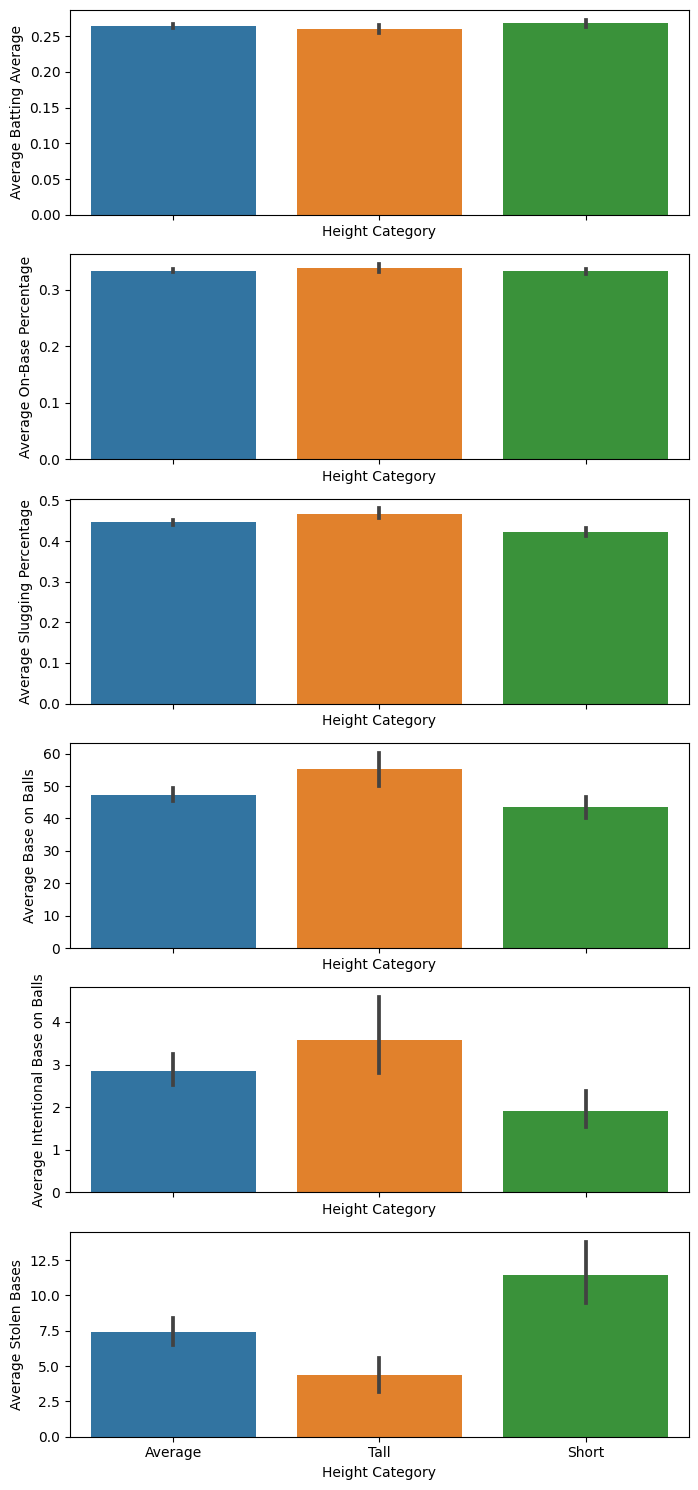

In [25]:
# Set up the matplotlib figure
f, axes = plt.subplots(6, 1, figsize=(7, 15), sharex=True)

sns.barplot(x='Height Category', y='AVG', data=player_avg_data, ax=axes[0])
axes[0].set_ylabel('Average Batting Average')

sns.barplot(x='Height Category', y='OBP', data=player_avg_data, ax=axes[1])
axes[1].set_ylabel('Average On-Base Percentage')

sns.barplot(x='Height Category', y='SLG', data=player_avg_data, ax=axes[2])
axes[2].set_ylabel('Average Slugging Percentage')

sns.barplot(x='Height Category', y='BB', data=player_avg_data, ax=axes[3])
axes[3].set_ylabel('Average Base on Balls')

sns.barplot(x='Height Category', y='IBB', data=player_avg_data, ax=axes[4])
axes[4].set_ylabel('Average Intentional Base on Balls')

sns.barplot(x='Height Category', y='SB', data=player_avg_data, ax=axes[5])
axes[5].set_ylabel('Average Stolen Bases')

plt.tight_layout()


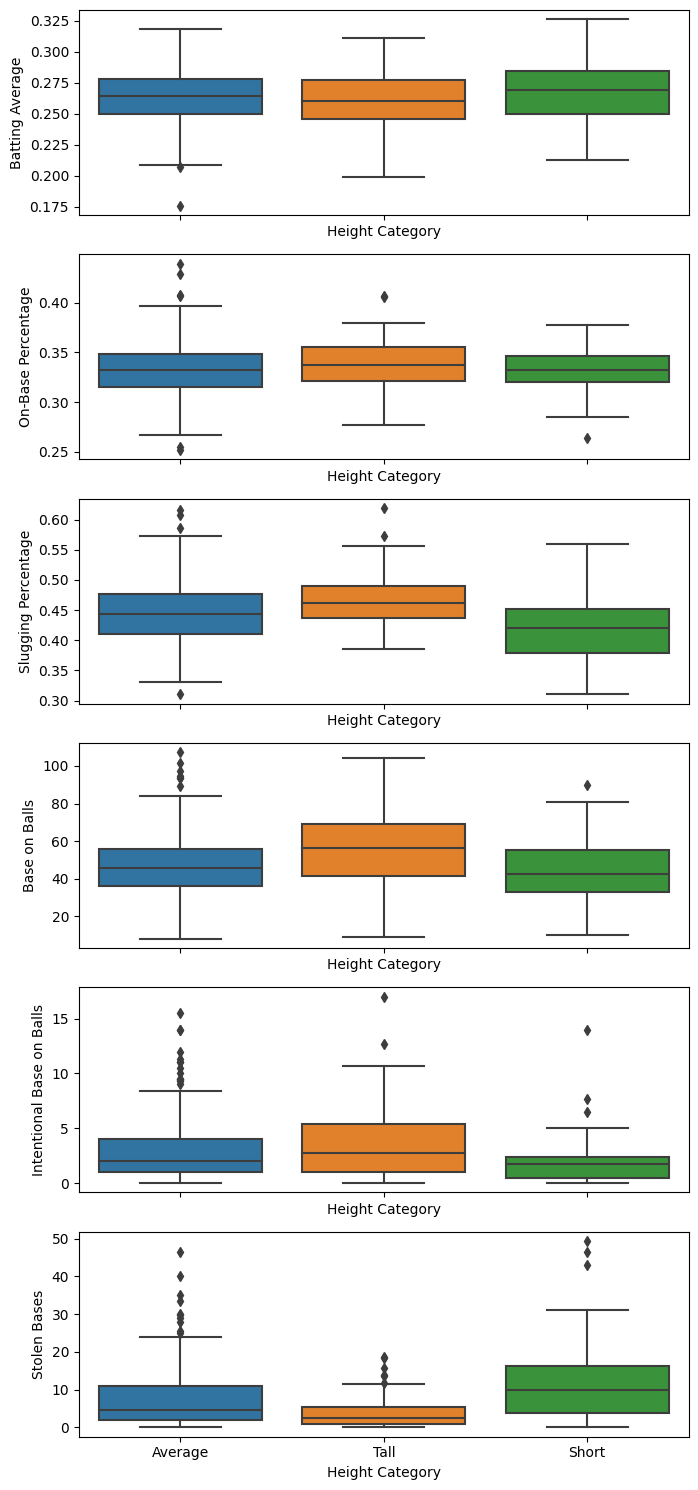

In [26]:
f, axes = plt.subplots(6, 1, figsize=(7, 15), sharex=True)

sns.boxplot(x='Height Category', y='AVG', data=player_avg_data, ax=axes[0])
axes[0].set_ylabel('Batting Average')

sns.boxplot(x='Height Category', y='OBP', data=player_avg_data, ax=axes[1])
axes[1].set_ylabel('On-Base Percentage')

sns.boxplot(x='Height Category', y='SLG', data=player_avg_data, ax=axes[2])
axes[2].set_ylabel('Slugging Percentage')

sns.boxplot(x='Height Category', y='BB', data=player_avg_data, ax=axes[3])
axes[3].set_ylabel('Base on Balls')

sns.boxplot(x='Height Category', y='IBB', data=player_avg_data, ax=axes[4])
axes[4].set_ylabel('Intentional Base on Balls')

sns.boxplot(x='Height Category', y='SB', data=player_avg_data, ax=axes[5])
axes[5].set_ylabel('Stolen Bases')

plt.tight_layout()



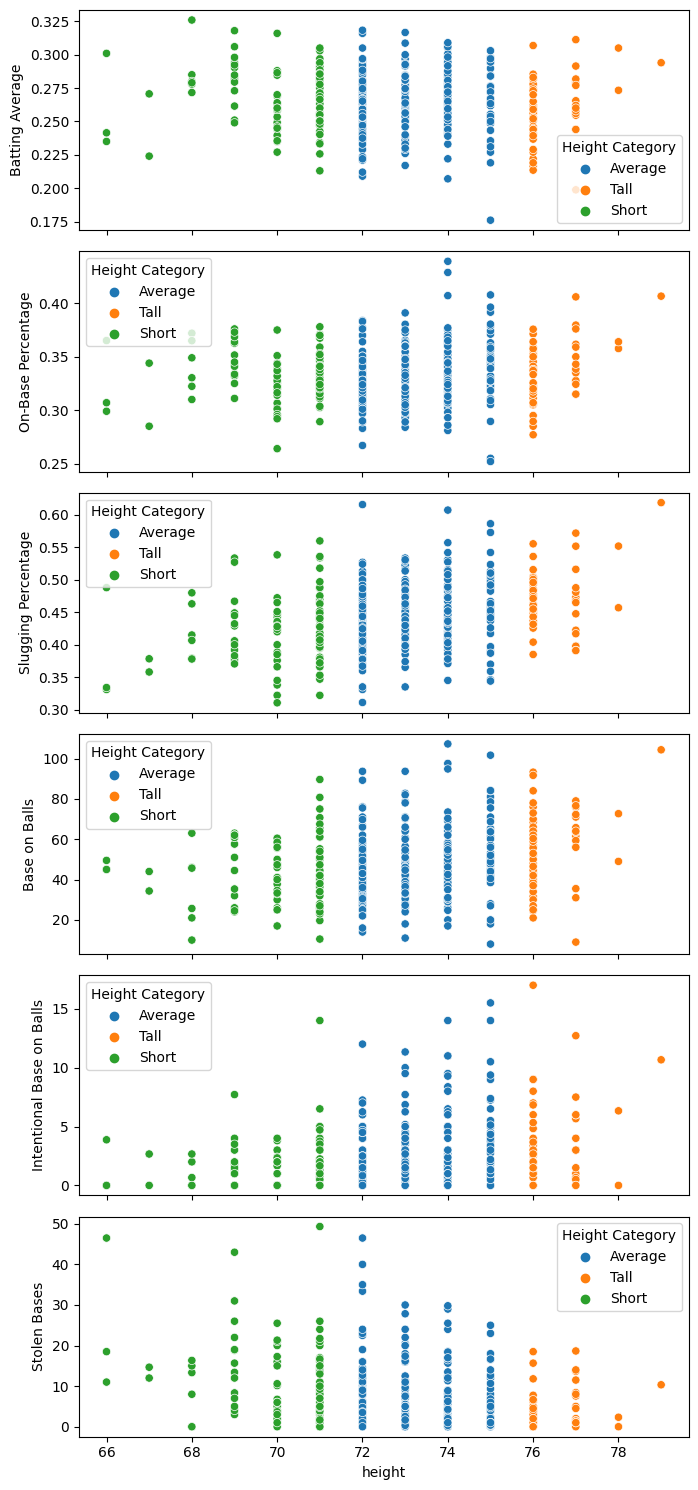

In [28]:
f, axes = plt.subplots(6, 1, figsize=(7, 15), sharex=True)

sns.scatterplot(x='height', y='AVG', hue='Height Category', data=player_avg_data, ax=axes[0])
axes[0].set_ylabel('Batting Average')

sns.scatterplot(x='height', y='OBP', hue='Height Category', data=player_avg_data, ax=axes[1])
axes[1].set_ylabel('On-Base Percentage')

sns.scatterplot(x='height', y='SLG', hue='Height Category', data=player_avg_data, ax=axes[2])
axes[2].set_ylabel('Slugging Percentage')

sns.scatterplot(x='height', y='BB', hue='Height Category', data=player_avg_data, ax=axes[3])
axes[3].set_ylabel('Base on Balls')

sns.scatterplot(x='height', y='IBB', hue='Height Category', data=player_avg_data, ax=axes[4])
axes[4].set_ylabel('Intentional Base on Balls')

sns.scatterplot(x='height', y='SB', hue='Height Category', data=player_avg_data, ax=axes[5])
axes[5].set_ylabel('Stolen Bases')

plt.tight_layout()
